Logistic Regression: binary classification의 기본 모델!

In [1]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)
data
# Sivsp: 함께 탑승한 형제 및 배우자 수
# Parch: 함께 탑승한 부모 및 자녀의 수
# Ticket: 티켓 번호
# Embark: 승선한 항구
# Survived: 종속변수(target variable)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
885,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
887,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


In [2]:
data.info()
# Non-null count가 889로 모두 같음 -> 결측치가 없으므로 바로 model fit 진행해도 됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [3]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [4]:
# 특정 feature(numeric feature)만 따로 sampling해 corr() 확인
# 0에 가까울수록 상관관계 x, -1: 역방향, +1: 정방향
# 0.2 이하는 상관관계가 거의 없다고 보면됨.
selected_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']
data_corr = data[selected_columns]
data_corr.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

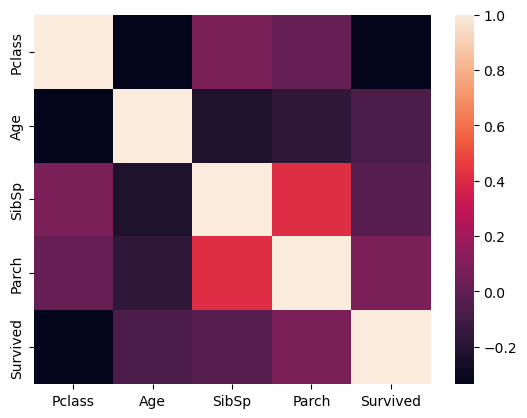

In [6]:
# corr() 기반 히트맵 생성하여 보여줌
sns.heatmap(data_corr.corr())
plt.show()

전처리 preprocessing

non-numeric variable에 대해서는 숫자 데이터로 변환해야 하는 경우가 있다. <br><br>
단, 가령 봄, 여름, 가을, 겨울이라는 변수를 1, 2, 3, 4로 치환하는 방법은 가급적 지양해야 한다.<br><br>
그 이유는 상대적인 서열이 반영되기 때문이다.<br><br>
-> 이런 문제를 피하기 위해서 더미 변수를 활용한다! <br><br>
예) sex에서 male female에 대한 dummy variable을 만들고 각각 0, 1로 이진 분류 시킨다 <br><br>
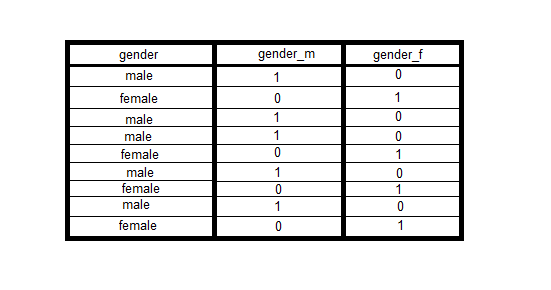
<br><br>
This is also called as one-hot encoding

In [7]:
# 해당 feature의 고윳값 개수 출력
print(data['Name'].nunique(),
    data['Sex'].nunique(),
    data['Ticket'].nunique(),
    data['Embarked'].nunique())

889 2 680 3


In [8]:
# Name과 Ticket은 너무 고윳값이 많다.
# 이러한 feature들은 꼭 결과 도출에 필요한 feature인지 확인해 봐야 한다.
delete_feature = ['Name', 'Ticket']
data.drop(delete_feature, axis=1)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [9]:
# 이제 one-hot encoding 시작
pd.get_dummies(data, columns=['Sex', 'Embarked']).head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0,False,True,False,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,1,True,False,True,False,False
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,1,True,False,False,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,1,True,False,False,False,True
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,0,False,True,False,False,True


In [10]:
# 고윳값-1 개로 one-hot encoding해도 충분함. dropfirst=True
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
data = data.drop(['Name', 'Ticket'], axis=1)

In [12]:
# 모델링 예측 ㄱ
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived'] # 종속 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [13]:
data.head

<bound method NDFrame.head of      Pclass   Age  SibSp  Parch  Survived  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0         0      True       False        True
1         1  38.0      1      0         1     False       False       False
2         3  26.0      0      0         1     False       False        True
3         1  35.0      1      0         1     False       False        True
4         3  35.0      0      0         0      True       False        True
..      ...   ...    ...    ...       ...       ...         ...         ...
884       2  27.0      0      0         0      True       False        True
885       1  19.0      0      0         1     False       False        True
886       3  28.0      1      2         0     False       False        True
887       1  26.0      0      0         1      True       False       False
888       3  32.0      0      0         0      True        True       False

[889 rows x 8 columns]>

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [15]:
# 점수 계산 (modelling끝나면 검사)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

accuracy_score가 78점 정도면 그렇게 나쁜 수준은 아님.<br><br>
80이상이면 notbad, 90이상이면 괜찮음<br><br>
향후 배울 XGBoost나 LightGBM을 사용하면 더 좋은 정확도 가능!

In [16]:
model.coef_

array([[-1.18228776, -0.03992138, -0.3212964 ,  0.00797071, -2.56870917,
        -0.07882855, -0.23553716]])

In [17]:
pd.Series(model.coef_, index = X.columns)

ValueError: Length of values (1) does not match length of index (7)

In [18]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.182288
Age          -0.039921
SibSp        -0.321296
Parch         0.007971
Sex_male     -2.568709
Embarked_Q   -0.078829
Embarked_S   -0.235537
dtype: float64

Feature Engineering <br><br>
: 기존 데이터를 손보아 더 나은 변수로 만드는 기법 <br><br>
: 더미 변수를 만드는 일도 일종의 피처 엔지니어링임 <br><br>

Multicollinearity 주의해야함.<br><br>
-> 독립변수 사이에 상관관계가 높은 때에 발생하는 문제 <br><br>
-> 예) A와 B의 상관계수가 모두 양수이고 상관관계가 매우 높다면, y가 증가한 이유가 A때문인지 B때문인지 명확하지 않음 <br><br>
-> 이런 Multicollinearity 문제 해결하기 위해서는 둘 중 하나를 제거하거나,
PCA같은 차원축소 방법으로 문제를 해결할 수 있음.<br><br>
-> 해당 Example에서는 Parch와 Sibsp가 이러한 문제를 보임<br><br>

In [19]:
# multicollinearity제거: SibSp와 Parch 합침
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [61]:
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [63]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

정확도가 소폭 상승함!

In [23]:
# 이번에는 합치지말고 하나를 지워보겠음!
# SibSp가 더 coef가 크므로 Parch를 날리자!
# data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
# data.drop(['Parch', 'Name', 'Ticket'], axis=1, inplace=True)
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [28]:
# data = data.drop(['Name', 'Ticket'], axis=1)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [31]:
# data.drop('Parch', axis=1, inplace=True)
data

,Pclass,Age,SibSp,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,True,False,True
1,1,38.0,1,1,False,False,False
2,3,26.0,0,1,False,False,True
3,1,35.0,1,1,False,False,True
4,3,35.0,0,0,True,False,True
...,...,...,...,...,...,...,...
884,2,27.0,0,0,True,False,True
885,1,19.0,0,1,False,False,True
886,3,28.0,1,0,False,False,True
887,1,26.0,0,1,True,False,False


In [32]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred2 = model.predict(X_test)
accuracy_score(y_test, pred2)

0.7808988764044944

왜 Parch변수를 날렸을때랑, 날리기 전이랑 accuracy_score가 같은지는 모르겠다..
ㅠ